#### Estrazione sentimenti singoli parchi


In [47]:
import pandas as pd
import numpy as np 
from nrclex import NRCLex 
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import sys

In [18]:
#read dataframe
filepath = '../dataframe/df_completec.csv'
df = pd.read_csv(filepath)

#### Ballyhoura

In [4]:
df = df[df['text1'].str.contains('ballyhoura')]

#### Analisi dei sentimenti per singolo parco

In [5]:
#Return affect frequencies
df["emotions_freq"] = df["text1"].apply(lambda x: NRCLex(x).affect_frequencies)
df_f= df[["text1","emotions_freq"]]
df_f.head()

,text1,emotions_freq
299,ballyhoura ceramic wise participant ballyhoura...,"{'fear': 0.07692307692307693, 'anger': 0.07692..."
300,come moat kilfinane overlook ballyhoura mounta...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
301,wild ballyhoura mtb rate ballyhoura mountainbi...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
302,ballyhoura mountain trail fantastic amenity do...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
303,deric tv xvkings zara riverislandpr pop ballyh...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [6]:
#Concateno il dataframe df_f in cui ho preso solo la colonna text1 con drop
# e quello in cui ho estratto il dizionario in formato pandas e messo le emozioni in colonna
#con .drop elimino la colonna anticip che è in più dato che esiste anticipation
df_s = pd.concat([df_f.drop(['emotions_freq'], axis = 1), df_f['emotions_freq'].apply(pd.Series).drop("anticip", axis=1)], axis = 1)

#Replace NaN with 0
df_s = df_s.replace(np.nan,0)
df_s.head()


,text1,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
299,ballyhoura ceramic wise participant ballyhoura...,0.076923,0.076923,0.076923,0.153846,0.230769,0.076923,0.0,0.0,0.153846,0.153846
300,come moat kilfinane overlook ballyhoura mounta...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.500000
301,wild ballyhoura mtb rate ballyhoura mountainbi...,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.0,0.0,0.000000,0.000000
302,ballyhoura mountain trail fantastic amenity do...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.000000,0.500000
303,deric tv xvkings zara riverislandpr pop ballyh...,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.0,0.0,0.166667,0.166667


#### Freq media

In [7]:
sys.path.insert(1,'..')
from Utility_Fede import aggregation
aggr = []
labels = []

for i in df_f['emotions_freq'].apply(pd.Series).drop("anticip", axis=1) : aggregation(i,df_s,aggr,labels)

fear :  0.020
anger :  0.021
trust :  0.120
surprise :  0.048
positive :  0.275
negative :  0.054
sadness :  0.015
disgust :  0.003
joy :  0.123
anticipation :  0.154


In [11]:
ballyhoura_df = pd.DataFrame(
    {'Ballyhoura': aggr
    }, index = labels)

ballyhoura_df

,Ballyhoura
fear,0.020
anger,0.021
trust,0.120
surprise,0.048
positive,0.275
negative,0.054
sadness,0.015
disgust,0.003
joy,0.123
anticipation,0.154


#### Shannon

In [19]:
df = pd.read_csv(filepath)
df = df[df['text1'].str.contains('shannon')]
df["emotions_freq"] = df["text1"].apply(lambda x: NRCLex(x).affect_frequencies)
df_f= df[["text1","emotions_freq"]]
df_s = pd.concat([df_f.drop(['emotions_freq'], axis = 1), df_f['emotions_freq'].apply(pd.Series).drop("anticip", axis=1)], axis = 1)
df_s = df_s.replace(np.nan,0)

aggr = []
labels = []

for i in df_f['emotions_freq'].apply(pd.Series).drop("anticip", axis=1) : aggregation(i,df_s,aggr,labels)
shannon_df = pd.DataFrame(
    {'Shannon': aggr
    }, index = labels)

shannon_df


fear :  0.034
anger :  0.025
trust :  0.130
surprise :  0.046
positive :  0.223
negative :  0.063
sadness :  0.027
disgust :  0.012
joy :  0.085
anticipation :  0.126


,Shannon
fear,0.034
anger,0.025
trust,0.130
surprise,0.046
positive,0.223
negative,0.063
sadness,0.027
disgust,0.012
joy,0.085
anticipation,0.126


In [20]:
df = pd.read_csv(filepath)
df = df[df['text1'].str.contains('ted russel')]
df["emotions_freq"] = df["text1"].apply(lambda x: NRCLex(x).affect_frequencies)
df_f= df[["text1","emotions_freq"]]
df_s = pd.concat([df_f.drop(['emotions_freq'], axis = 1), df_f['emotions_freq'].apply(pd.Series).drop("anticip", axis=1)], axis = 1)
df_s = df_s.replace(np.nan,0)

aggr = []
labels = []

for i in df_f['emotions_freq'].apply(pd.Series).drop("anticip", axis=1) : aggregation(i,df_s,aggr,labels)
ted_russel_df = pd.DataFrame(
    {'Ted russel': aggr
    }, index = labels)

ted_russel_df

fear :  0.058
anger :  0.014
trust :  0.163
surprise :  0.017
positive :  0.261
negative :  0.044
sadness :  0.055
disgust :  0.014
joy :  0.091
anticipation :  0.086


,Ted russel
fear,0.058
anger,0.014
trust,0.163
surprise,0.017
positive,0.261
negative,0.044
sadness,0.055
disgust,0.014
joy,0.091
anticipation,0.086


#### Westfields

In [21]:
df = pd.read_csv(filepath)
df = df[df['text1'].str.contains('westfields')]
df["emotions_freq"] = df["text1"].apply(lambda x: NRCLex(x).affect_frequencies)
df_f= df[["text1","emotions_freq"]]
df_s = pd.concat([df_f.drop(['emotions_freq'], axis = 1), df_f['emotions_freq'].apply(pd.Series).drop("anticip", axis=1)], axis = 1)
df_s = df_s.replace(np.nan,0)

aggr = []
labels = []

for i in df_f['emotions_freq'].apply(pd.Series).drop("anticip", axis=1) : aggregation(i,df_s,aggr,labels)
westfields_df = pd.DataFrame(
    {'Westfields': aggr
    }, index = labels)

westfields_df

fear :  0.040
anger :  0.017
trust :  0.091
surprise :  0.017
positive :  0.193
negative :  0.024
sadness :  0.014
disgust :  0.002
joy :  0.046
anticipation :  0.064


,Westfields
fear,0.040
anger,0.017
trust,0.091
surprise,0.017
positive,0.193
negative,0.024
sadness,0.014
disgust,0.002
joy,0.046
anticipation,0.064


#### Merge all the parks in one df

In [29]:
df_parks = pd.concat([ballyhoura_df, westfields_df, shannon_df], axis=1)
df_parks

,Ballyhoura,Westfields,Shannon
fear,0.020,0.040,0.034
anger,0.021,0.017,0.025
trust,0.120,0.091,0.130
surprise,0.048,0.017,0.046
positive,0.275,0.193,0.223
negative,0.054,0.024,0.063
sadness,0.015,0.014,0.027
disgust,0.003,0.002,0.012
joy,0.123,0.046,0.085
anticipation,0.154,0.064,0.126


Text(0, 0.5, 'Frequencies')

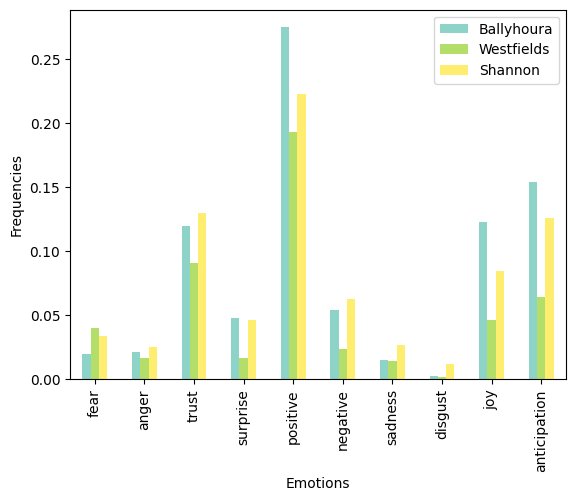

In [54]:
cmap = cm.get_cmap('Set3') # Colour map (there are many others)

df_parks.plot.bar(cmap = cmap)

plt.xlabel("Emotions")
plt.ylabel("Frequencies")
